In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,date
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
movies_df = pd.read_csv("movies100.txt",sep=",",header=0, index_col=0)
movies_df['Ones'] = 1   # need to add for OLS, intercept
movies_df['LogAveDPT'] = np.log(movies_df['AveDPT'])
movies_df = pd.concat([movies_df, pd.get_dummies(movies_df['Rating'])], axis=1)
movies_df.tail(20)

,Actors,AveDPT,Directors,DomesticOpeningWeekend,DomesticTotalGross,Genre,MovieTitle,ProductionBudget,Rating,ReleaseDate,Runtime,Theaters,Ones,LogAveDPT,G,PG,PG-13,R
80,Will Smith,21411,Francis Lawrence,77211321,256393010,Sci-Fi Horror,I Am Legend,150000000,PG-13,2007-12-14,100,3606,1,9.971660,0,0,1,0
81,"Sandra Bullock,Kathy Bates,Lily Collins",10971,John Lee Hancock,34119372,255959475,Sports Drama,The Blind Side,29000000,PG-13,2009-11-20,126,3110,1,9.303011,0,0,1,0
82,"Ian McKellen,Orlando Bloom,Evangeline Lilly,Ca...",14122,Peter Jackson,54724334,255119788,Fantasy,The Hobbit: The Battle of the Five Armies,NaN,PG-13,2014-12-17,144,3875,1,9.555489,0,0,1,0
83,"Bradley Cooper,Ed Helms,Zach Galifianakis,Just...",23775,Todd Phillips,85946294,254464305,Comedy,The Hangover Part II,80000000,R,2011-05-26,102,3615,1,10.076390,0,0,0,1
84,"Steve Carell,Jason Segel,Russell Brand,Kristen...",16225,"Pierre Coffin,Chris Renaud",56397125,251513985,Animation,Despicable Me,69000000,PG,2010-07-09,95,3476,1,9.694309,0,1,0,0
85,"Jack Nicholson,Michael Keaton,Kim Basinger",18454,Tim Burton,40489746,251188924,Action / Adventure,Batman,35000000,PG-13,1989-06-23,126,2194,1,9.823036,0,0,1,0
86,"Ben Stiller,Robin Williams,Steve Coogan,Owen W...",8258,Shawn Levy,30433781,250863268,Family Adventure,Night at the Museum,NaN,PG,2006-12-22,108,3685,1,9.018938,0,1,0,0
87,"Tommy Lee Jones,Will Smith",16910,Barry Sonnenfeld,51068455,250690539,Sci-Fi Comedy,Men in Black,90000000,PG-13,1997-07-02,97,3020,1,9.735660,0,0,1,0
88,"Daniel Radcliffe,Emma Watson,Rupert Grint,Alan...",24302,Alfonso Cuaron,93687367,249541069,Fantasy,Harry Potter and the Prisoner of Azkaban,130000000,PG,2004-06-04,142,3855,1,10.098314,0,1,0,0
89,"Harrison Ford,Alfred Molina",7704,Steven Spielberg,8305823,212222025,Period Adventure,Raiders of the Lost Ark,18000000,PG,1981-06-12,115,1078,1,8.949495,0,1,0,0


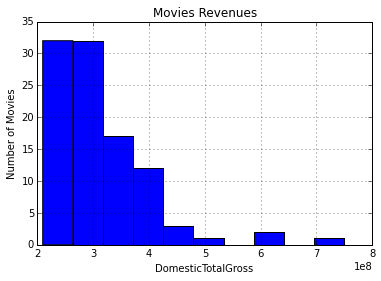

In [3]:
movies_df['DomesticTotalGross'].hist()
plt.title('Revenues')
plt.xlabel('Domestic Total Gross (USD)')
plt.ylabel('Number of Movies')
plt.show()



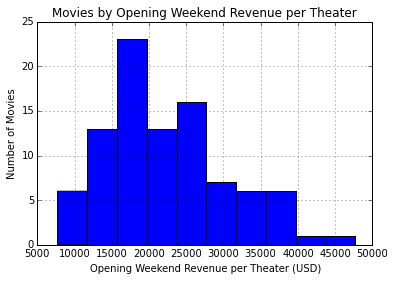

In [4]:
movies_df['AveDPT'].hist()
plt.title('Movies by Opening Weekend Revenue per Theater')
plt.xlabel('Opening Weekend Revenue per Theater (USD)')
plt.ylabel('Number of Movies')
plt.show()

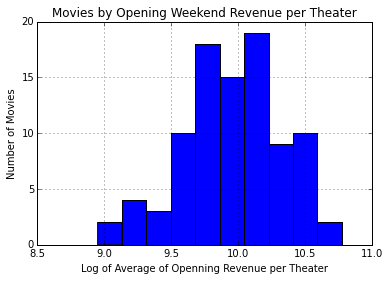

In [5]:
movies_df['LogAveDPT'].hist()
plt.title("Movies by Opening Weekend Revenue per Theater")
plt.xlabel("Log of Average of Openning Revenue per Theater")
plt.ylabel("Number of Movies")

In [6]:
movies_without_AveDPT = movies_df[np.isnan(movies_df.AveDPT)]

movies_with_AveDPT = movies_df.dropna()
movies_with_AveDPT.head(10)
#print type(movies_with_AveDPT)
#plt.scatter(movies_df.AveDPT, movies_df.DomesticTotalGross)

#plt.title('How does budget relate to final box office revenue?')
#plt.xlabel('Opening Weekend Revenue per Theater (USD)')
#plt.ylabel('Domestic Total Gross (USD)')


,Actors,AveDPT,Directors,DomesticOpeningWeekend,DomesticTotalGross,Genre,MovieTitle,ProductionBudget,Rating,ReleaseDate,Runtime,Theaters,Ones,LogAveDPT,G,PG,PG-13,R
1,"Leonardo DiCaprio,Kate Winslet,Kathy Bates,Ioa...",10710,James Cameron,28638131,600788188,Romance,Titanic,200000000,PG-13,1997-12-19,194,2674,1,9.278933,0,0,1,0
2,"Robert Downey, Jr.,Chris Hemsworth,Chris Evans...",47698,Joss Whedon,207438708,623357910,Action / Adventure,Marvel's The Avengers,220000000,PG-13,2012-05-04,142,4349,1,10.772645,0,0,1,0
3,"Christian Bale,Heath Ledger,Aaron Eckhart,Morg...",36283,Christopher Nolan,158411483,533345358,Action / Adventure,The Dark Knight,185000000,PG-13,2008-07-18,150,4366,1,10.499105,0,0,1,0
4,"Liam Neeson,Ewan McGregor,Natalie Portman,Samu...",21825,George Lucas,64820970,431088295,Sci-Fi Fantasy,Star Wars: Episode I - The Phantom Menace,115000000,PG,1999-05-19,133,2970,1,9.990811,0,1,0,0
6,"Christian Bale,Michael Caine,Anne Hathaway,Tom...",36532,Christopher Nolan,160887295,448139099,Action Thriller,The Dark Knight Rises,250000000,PG-13,2012-07-20,165,4404,1,10.505944,0,0,1,0
7,"Mike Myers,Cameron Diaz,Eddie Murphy,Antonio B...",25951,"Andrew Adamson,Kelly Asbury,Conrad Vernon",108037878,441226247,Animation,Shrek 2,150000000,PG,2004-05-19,93,4163,1,10.163965,0,1,0,0
8,Drew Barrymore,10730,Steven Spielberg,11835389,359197037,Family Adventure,E.T.: The Extra-Terrestrial,10500000,PG,1982-06-11,117,1103,1,9.280799,0,1,0,0
9,"Jennifer Lawrence,Josh Hutcherson,Liam Hemswor...",37971,Francis Lawrence,158074286,424668047,Action / Adventure,The Hunger Games: Catching Fire,130000000,PG-13,2013-11-22,146,4163,1,10.544578,0,0,1,0
10,"Johnny Depp,Orlando Bloom,Keira Knightley,Jack...",32817,Gore Verbinski,135634554,423315812,Period Adventure,Pirates of the Caribbean: Dead Man's Chest,225000000,PG-13,2006-07-07,151,4133,1,10.398702,0,0,1,0
12,"Tom Hanks,Michael Keaton,Tim Allen,Bonnie Hunt...",27385,Lee Unkrich,110307189,415004880,Animation,Toy Story 3,200000000,G,2010-06-18,103,4028,1,10.217751,1,0,0,0


In [7]:
# randomly dividing data set into testing and training sets
msk = np.random.rand(len(movies_with_AveDPT)) < 0.75
training = movies_with_AveDPT[msk]
testing = movies_with_AveDPT[-msk]
#len(movies_df)
len(training)
#training.head(20)

66

64

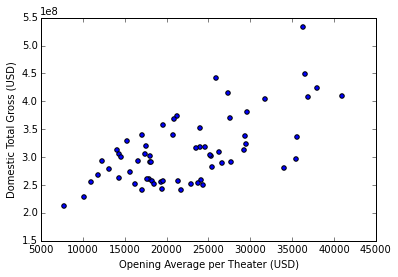

In [8]:
# removing outliers
removedDTG = (training[np.abs(training.DomesticTotalGross - training.DomesticTotalGross.mean())
                         <= (3*training.DomesticTotalGross.std())])
removedDTG = (removedDTG[np.abs(removedDTG.LogAveDPT - removedDTG.LogAveDPT.mean())
                         <= (3*removedDTG.LogAveDPT.std())])
removedDTG = (removedDTG[np.abs(removedDTG.Runtime - removedDTG.Runtime.mean())
                         <= (3*removedDTG.Runtime.std())])
plt.scatter(removedDTG['AveDPT'],removedDTG['DomesticTotalGross'])
plt.xlabel('Opening Average per Theater (USD)')
plt.ylabel('Domestic Total Gross (USD)')
len(removedDTG)

In [9]:
# testing Log of AveDPT
X = removedDTG[['LogAveDPT','Ones']]
Y = removedDTG['DomesticTotalGross']
model_log = smf.OLS(Y,X).fit()
print model_log.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     35.92
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           1.14e-07
Time:                        16:38:04   Log-Likelihood:                -1223.9
No. Observations:                  64   AIC:                             2452.
Df Residuals:                      62   BIC:                             2456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LogAveDPT   1.067e+08   1.78e+07      5.993      0.0

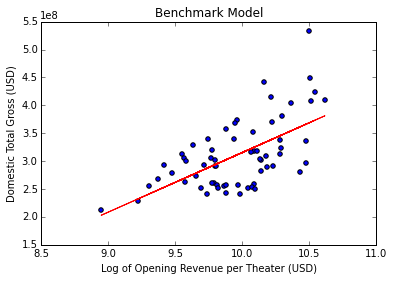

In [10]:
plt.scatter(removedDTG['LogAveDPT'],removedDTG['DomesticTotalGross'])
plt.title('Benchmark Model')
plt.xlabel('Log of Opening Revenue per Theater (USD)')
plt.ylabel('Domestic Total Gross (USD)')
plt.plot(removedDTG['LogAveDPT'],model_log.predict(X),'r-')
plt.savefig("LogAveDPT_fit.png")


17


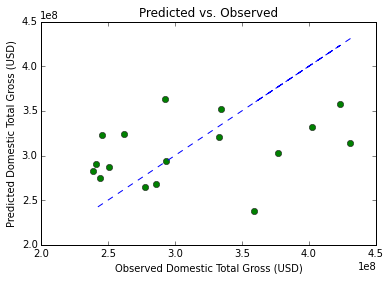

In [11]:
# the actual vs. the predicted values
Yobs = testing['DomesticTotalGross']
testInput = testing[['LogAveDPT','Ones']]
predictedDTG = model_log.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 
#plt.plot(range(10))
plt.savefig('LogAveDPT_test.png')

In [12]:
# building more advanced model than just a banchmark
X = removedDTG[['LogAveDPT','Runtime','Ones']]
Y = removedDTG['DomesticTotalGross']
adv_model = smf.OLS(Y,X).fit()
print adv_model.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     19.28
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           3.25e-07
Time:                        16:38:40   Log-Likelihood:                -1222.9
No. Observations:                  64   AIC:                             2452.
Df Residuals:                      61   BIC:                             2458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LogAveDPT   1.011e+08   1.81e+07      5.590      0.0

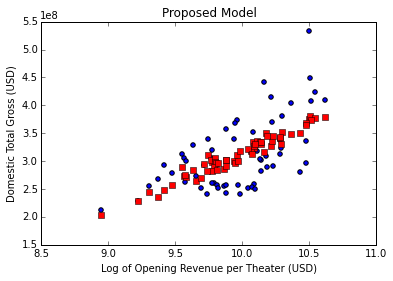

In [14]:
plt.scatter(removedDTG['LogAveDPT'],removedDTG['DomesticTotalGross'])
plt.title('Proposed Model')
plt.xlabel('Log of Opening Revenue per Theater (USD)')
plt.ylabel('Domestic Total Gross (USD)')
plt.plot(removedDTG['LogAveDPT'],adv_model.predict(X),'rs')
plt.savefig("LogAveDPT_Runtime_fit.png")

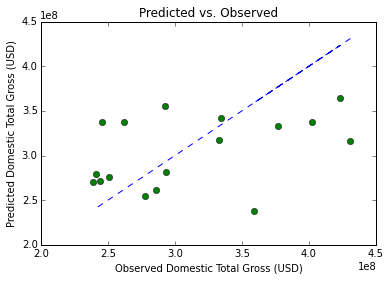

In [15]:
# test the advance model on a testing set
Yobs = testing['DomesticTotalGross']
testInput = testing[['LogAveDPT','Runtime','Ones']]
predDTG = adv_model.predict(testInput)
plt.plot(Yobs,predDTG,'go')
plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 
#plt.plot(range(10))
plt.savefig("LogAveDPT_Runtime_test.png")

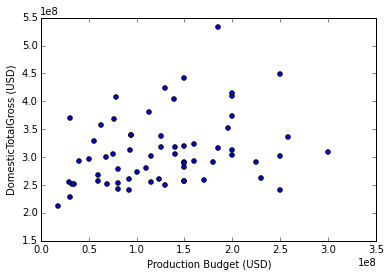

In [17]:
plt.scatter(removedDTG['ProductionBudget'],removedDTG['DomesticTotalGross'])
plt.xlabel('Production Budget (USD)')
plt.ylabel('DomesticTotalGross (USD)')


In [ ]:
# adding one more significant parameter

In [18]:
# model for budget itself
X = removedDTG[['ProductionBudget','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
lmodel = smf.OLS(Y,X).fit()
lmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.959
Date:                Thu, 23 Apr 2015   Prob (F-statistic):             0.0175
Time:                        16:39:21   Log-Likelihood:                -1235.6
No. Observations:                  64   AIC:                             2475.
Df Residuals:                      62   BIC:                             2480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
ProductionBudget     0.2753      0.113      2.441      0.018         0.050     0.501
Ones              2.756e+08   1.63e+07     16.910      0.000      2.43e+08  3.08e+08
==============================================================================
Omnibus:                       14.321   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.691
Skew:                           1.085   Prob(JB):                     0.000392
Kurtosis:                       4.085   Cond. No.                     3.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

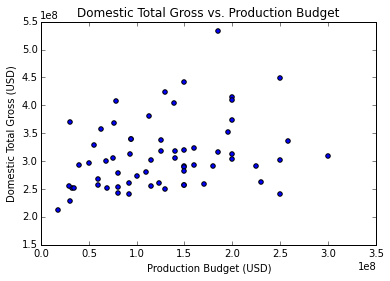

In [33]:
plt.scatter(removedDTG.ProductionBudget, removedDTG.DomesticTotalGross)
plt.title('Domestic Total Gross vs. Production Budget')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Domestic Total Gross (USD)')

#plt.plot(removedDTG.ProductionBudget, lmodel.predict(X), 'r-')


#plt.plot(range(10))
plt.savefig('pl01_data.png')


17


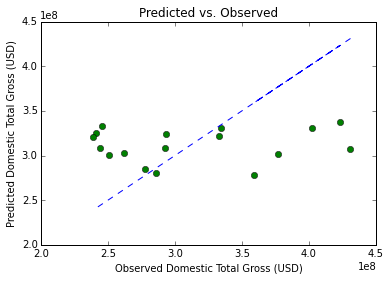

In [20]:
# the actual vs. the predicted values
Yobs = testing['DomesticTotalGross']
testInput = testing[['ProductionBudget','Ones']]
predictedDTG = lmodel.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 
#plt.plot(range(10))
plt.savefig('pl02.png')

In [21]:
# Need ones because statsmodels wants to multiply with this one the constant parameter

X = removedDTG[['AveDPT','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
linmodel = smf.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     42.81
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           1.32e-08
Time:                        16:39:40   Log-Likelihood:                -1221.7
No. Observations:                  64   AIC:                             2447.
Df Residuals:                      62   BIC:                             2452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AveDPT      5211.5318    796.546      6.543      0.000      3619.259  6803.805
Ones        1.939e+08   1.89e+07     10.267      0.000      1.56e+08  2.32e+08
==============================================================================
Omnibus:                        4.275   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.446
Skew:                           0.543   Prob(JB):                        0.179
Kurtosis:                       3.333   Cond. No.                     7.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

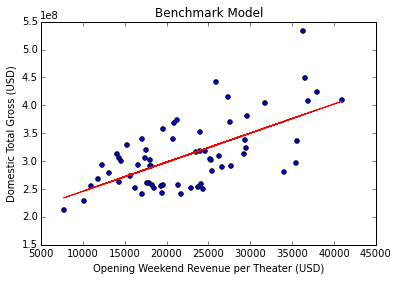

In [25]:
plt.scatter(removedDTG.AveDPT, removedDTG.DomesticTotalGross)
plt.title('Benchmark Model')
plt.xlabel('Opening Weekend Revenue per Theater (USD)')
plt.ylabel('Domestic Total Gross (USD)')

plt.plot(removedDTG.AveDPT, linmodel.predict(X),'r-')
plt.savefig('AveDPT_fit.png')

17


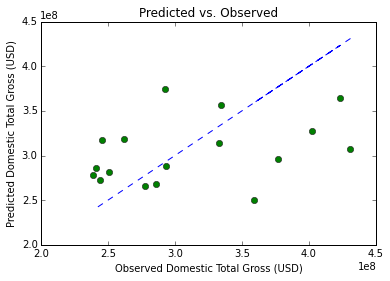

In [26]:
# the actual vs. the predicted values
# the actual vs. the predicted values
Yobs = testing['DomesticTotalGross']
testInput = testing[['AveDPT','Ones']]
predictedDTG = linmodel.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 
#plt.plot(range(10))
plt.savefig('AveDPT_test.png')

In [27]:
# better? more complex model
X = removedDTG[['AveDPT','Runtime','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
linearmodel = smf.OLS(Y,X).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     22.69
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           4.30e-08
Time:                        16:40:28   Log-Likelihood:                -1220.7
No. Observations:                  64   AIC:                             2447.
Df Residuals:                      61   BIC:                             2454.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AveDPT      4965.8935    810.145      6.130      0.000      3345.909  6585.878
Runtime     3.889e+05    2.8e+05      1.390      0.170     -1.71e+05  9.48e+05
Ones        1.498e+08   3.68e+07      4.069      0.000      7.62e+07  2.23e+08
==============================================================================
Omnibus:                        6.436   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.546
Skew:                           0.651   Prob(JB):                       0.0625
Kurtosis:                       3.619   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

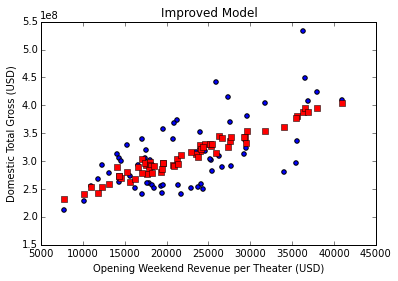

In [28]:
##3D data but 2D plot
plt.scatter(removedDTG.AveDPT, removedDTG.DomesticTotalGross)
plt.title('Improved Model')
plt.xlabel('Opening Weekend Revenue per Theater (USD)')
plt.ylabel('Domestic Total Gross (USD)')

plt.plot(removedDTG.AveDPT, linearmodel.predict(X), 'rs')

#plt.plot(range(4))
plt.savefig('Improved_model_fit.png')

17


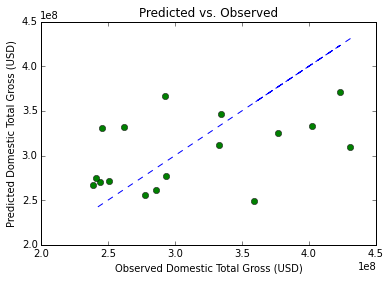

In [29]:
# predicted vs observed
Yobs = testing['DomesticTotalGross']
testInput = testing[['AveDPT','Runtime','Ones']]
predictedDTG = linearmodel.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 

plt.savefig('ImprovedModel_test.png')

In [200]:
# budget and Openning week
# better? more complex model
X = removedDTG[['ProductionBudget','AveDPT','Runtime','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
linearmodel_got = smf.OLS(Y,X).fit()
linearmodel_got.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     14.57
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           3.26e-07
Time:                        02:00:48   Log-Likelihood:                -1204.3
No. Observations:                  63   AIC:                             2417.
Df Residuals:                      59   BIC:                             2425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
ProductionBudget     0.0565      0.107      0.529      0.598        -0.157     0.270
AveDPT            4643.5983    921.258      5.040      0.000      2800.166  6487.031
Runtime           5.791e+05   2.77e+05      2.090      0.041      2.48e+04  1.13e+06
Ones              1.287e+08    3.7e+07      3.477      0.001      5.47e+07  2.03e+08
==============================================================================
Omnibus:                        6.073   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.191
Skew:                           0.658   Prob(JB):                       0.0746
Kurtosis:                       3.494   Cond. No.                     8.60e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
plt.scatter(removedDTG.ProductionBudget, removedDTG.DomesticTotalGross)
plt.title('Domestic Total Gross vs. Production Budget')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Domestic Total Gross (USD)')
plt.plot(removedDTG.ProductionBudget, linearmodel_got.predict(X), 'rs')
#plt.savefig('pl07.png')

NameError: name 'plt' is not defined

29


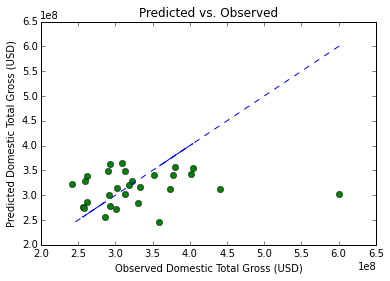

In [237]:
# predicted vs observed
Yobs = testing['DomesticTotalGross']
testInput = testing[['ProductionBudget','AveDPT','Runtime','Ones']]
predictedDTG = linearmodel_got.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 

plt.savefig('pl08.png')

In [302]:
# budget and Openning week
# better? more complex model
X = removedDTG[['ProductionBudget','AveDPT','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
linearmodel_PB = smf.OLS(Y,X).fit()
linearmodel_PB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     18.63
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           5.10e-07
Time:                        02:32:31   Log-Likelihood:                -1206.6
No. Observations:                  63   AIC:                             2419.
Df Residuals:                      60   BIC:                             2426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
ProductionBudget     0.1103      0.107      1.035      0.305        -0.103     0.323
AveDPT            4781.2258    944.353      5.063      0.000      2892.239  6670.212
Ones              1.931e+08   2.11e+07      9.136      0.000      1.51e+08  2.35e+08
==============================================================================
Omnibus:                        4.238   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.771
Skew:                           0.599   Prob(JB):                        0.152
Kurtosis:                       3.040   Cond. No.                     4.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

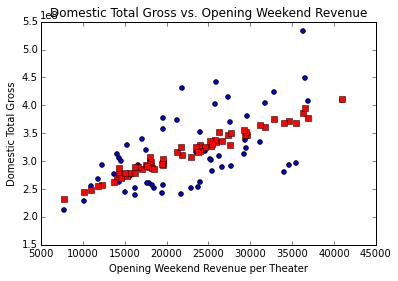

In [303]:
##3D data but 2D plot
plt.scatter(removedDTG.AveDPT, removedDTG.DomesticTotalGross)
plt.title('Domestic Total Gross vs. Opening Weekend Revenue')
plt.xlabel('Opening Weekend Revenue per Theater')
plt.ylabel('Domestic Total Gross')

plt.plot(removedDTG.AveDPT, linearmodel_PB.predict(X), 'rs')

#plt.plot(range(4))
plt.savefig('pl09.png')

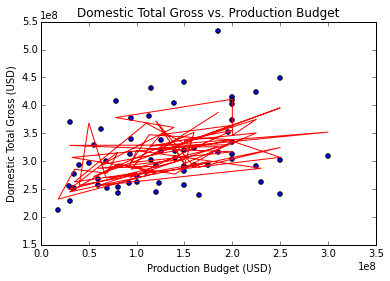

In [304]:
plt.scatter(removedDTG.ProductionBudget, removedDTG.DomesticTotalGross)
plt.title('Domestic Total Gross vs. Production Budget')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Domestic Total Gross (USD)')

plt.plot(removedDTG.ProductionBudget, linearmodel_PB.predict(X), 'r-')


#plt.plot(range(10))
plt.savefig('pl10.png')



29


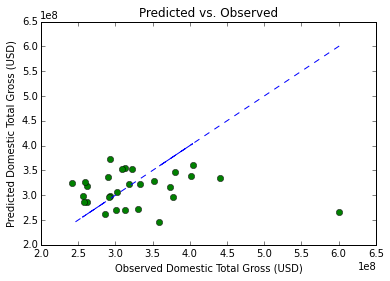

In [305]:
# predicted vs observed
Yobs = testing['DomesticTotalGross']
testInput = testing[['ProductionBudget','AveDPT','Ones']]
predictedDTG = linearmodel_PB.predict(testInput)
print len(Yobs)
plt.plot(Yobs, predictedDTG, 'go')

plt.title('Predicted vs. Observed')
plt.xlabel('Observed Domestic Total Gross (USD)')
plt.ylabel('Predicted Domestic Total Gross (USD)')

plt.plot(Yobs,Yobs, 'b--', label="Prediction") 

plt.savefig('pl11.png')

In [156]:
# including movies rating
X = removedDTG[['AveDPT','Runtime','G','PG','Ones']]
Y = removedDTG['DomesticTotalGross']

# OLS = ordinary least squares
 #linearmodel_all = smf.OLS(Y,X).fit()
#linearmodel_all.summary()

KeyError: "['G' 'PG'] not in index"

~~~~~~~Next are sklearn~~~~~~~~~~~~~~~

In [39]:
# Linear Regression again, but with scikit.learn
from sklearn.linear_model import LinearRegression

X = movies_with_AveDPT[['AveDPT']] # X has to be a matrix
Y = movies_with_AveDPT['DomesticTotalGross']

sk_linmodel = LinearRegression()
sk_linmodel.fit(X,Y) # NOTE: X,Y, not Y,X as in statsmodel. Why? Because!

print 'coefficient:\t %g' % sk_linmodel.coef_ # "Internal" 
print 'intercept:  \t %g' % sk_linmodel.intercept_ # "Internal"
print 'R squared:  \t %g' % sk_linmodel.score(X,Y)

coefficient:	 5016.19
intercept:  	 2.06123e+08
R squared:  	 0.268007


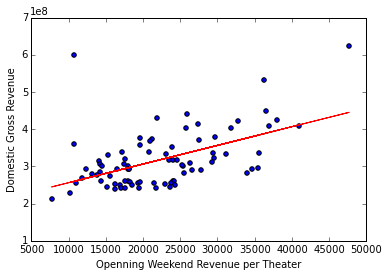

In [41]:
plt.scatter(X,Y)
plt.xlabel('Openning Weekend Revenue per Theater')
plt.ylabel('Domestic Gross Revenue')
plt.plot(X, sk_linmodel.predict(X), 'r-')
plt.show()

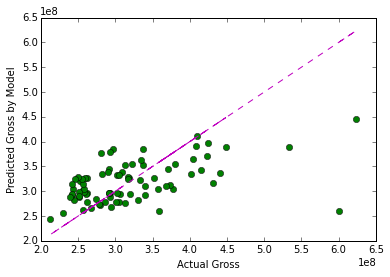

In [43]:
# the actual vs. the predicted values
plt.plot(Y, sk_linmodel.predict(X), 'go')

plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross by Model')

plt.plot(Y,Y, 'm--', label="Prediction") # Magenda dashed line
#plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     11.32
Date:                Thu, 23 Apr 2015   Prob (F-statistic):           6.88e-05
Time:                        00:33:35   Log-Likelihood:                -1190.4
No. Observations:                  62   AIC:                             2387.
Df Residuals:                      59   BIC:                             2393.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AveDPT      4020.9029   1013.398      3.968      0.000      1993.098  6048.708
Runtime     5.024e+05   2.94e+05      1.708      0.093     -8.63e+04  1.09e+06
Ones        1.584e+08   4.05e+07      3.913      0.000      7.74e+07  2.39e+08
==============================================================================
Omnibus:                        7.614   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.161
Skew:                           0.819   Prob(JB):                       0.0279
Kurtosis:                       3.297   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
movies_with_AveDPT['TitleLength'] = [len(title) for title in movies_with_AveDPT.MovieTitle]
movies_with_budget.head()

,Actors,AveDPT,Directors,DomesticOpeningWeekend,DomesticTotalGross,Genre,MovieTitle,ProductionBudget,Rating,ReleaseDate,Runtime,Theaters,Ones
1,"Leonardo DiCaprio,Kate Winslet,Kathy Bates,Ioa...",10710,James Cameron,28638131,600788188,Romance,Titanic,200000000,PG-13,1997-12-19,194,2674,1
2,"Robert Downey, Jr.,Chris Hemsworth,Chris Evans...",47698,Joss Whedon,207438708,623357910,Action / Adventure,Marvel's The Avengers,220000000,PG-13,2012-05-04,142,4349,1
3,"Christian Bale,Heath Ledger,Aaron Eckhart,Morg...",36283,Christopher Nolan,158411483,533345358,Action / Adventure,The Dark Knight,185000000,PG-13,2008-07-18,150,4366,1
4,"Liam Neeson,Ewan McGregor,Natalie Portman,Samu...",21825,George Lucas,64820970,431088295,Sci-Fi Fantasy,Star Wars: Episode I - The Phantom Menace,115000000,PG,1999-05-19,133,2970,1
6,"Christian Bale,Michael Caine,Anne Hathaway,Tom...",36532,Christopher Nolan,160887295,448139099,Action Thriller,The Dark Knight Rises,250000000,PG-13,2012-07-20,165,4404,1


In [58]:
X = movies_with_AveDPT[['AveDPT','Runtime','TitleLength','Ones']]
Y = movies_with_AveDPT['DomesticTotalGross']

linmodel = smf.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     17.32
Date:                Wed, 22 Apr 2015   Prob (F-statistic):           9.78e-09
Time:                        20:45:57   Log-Likelihood:                -1603.7
No. Observations:                  83   AIC:                             3215.
Df Residuals:                      79   BIC:                             3225.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
AveDPT       4574.4482    864.187      5.293      0.000      2854.326  6294.570
Runtime      1.263e+06   3.11e+05      4.065      0.000      6.44e+05  1.88e+06
TitleLength -1.264e+06   5.42e+05     -2.331      0.022     -2.34e+06 -1.85e+05
Ones         8.294e+07   3.83e+07      2.168      0.033      6.78e+06  1.59e+08
==============================================================================
Omnibus:                       22.769   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.799
Skew:                           1.140   Prob(JB):                     2.78e-08
Kurtosis:                       5.206   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X = movies_with_AveDPT[['AveDPT','Runtime','Ones']]
Y = movies_with_AveDPT['DomesticTotalGross']
model = smf.OLS(Y,X).fit()
model.summary()
#len(movies_with_AveDPT)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     22.05
Date:                Wed, 22 Apr 2015   Prob (F-statistic):           2.37e-08
Time:                        21:09:49   Log-Likelihood:                -1606.5
No. Observations:                  83   AIC:                             3219.
Df Residuals:                      80   BIC:                             3226.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AveDPT      4456.4939    886.290      5.028      0.000      2692.720  6220.268
Runtime     9.415e+05   2.86e+05      3.291      0.001      3.72e+05  1.51e+06
Ones        9.829e+07   3.87e+07      2.539      0.013      2.12e+07  1.75e+08
==============================================================================
Omnibus:                       34.669   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.141
Skew:                           1.453   Prob(JB):                     1.46e-18
Kurtosis:                       6.912   Cond. No.                     1.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

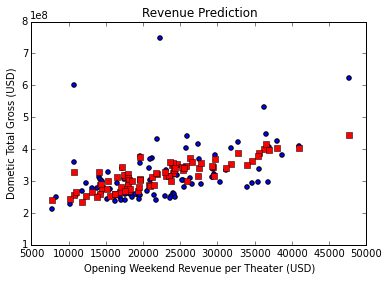

In [75]:
# Multi-dimensional regression, but only plot 2D
plt.scatter(movies_df.AveDPT, movies_df.DomesticTotalGross)
plt.title('Revenue Prediction')
plt.xlabel('Opening Weekend Revenue per Theater (USD)')
plt.ylabel('Dometic Total Gross (USD)')
plt.plot(movies_with_AveDPT.AveDPT, model.predict(X), 'rs')


In [76]:
movies_with_AveDPT = pd.concat([movies_with_AveDPT, pd.get_dummies(movies_with_AveDPT['Rating'])], axis=1) # We're adding columns, not rows
movies_with_budget.head()

,Actors,AveDPT,Directors,DomesticOpeningWeekend,DomesticTotalGross,Genre,MovieTitle,ProductionBudget,Rating,ReleaseDate,Runtime,Theaters,Ones
1,"Leonardo DiCaprio,Kate Winslet,Kathy Bates,Ioa...",10710,James Cameron,28638131,600788188,Romance,Titanic,200000000,PG-13,1997-12-19,194,2674,1
2,"Robert Downey, Jr.,Chris Hemsworth,Chris Evans...",47698,Joss Whedon,207438708,623357910,Action / Adventure,Marvel's The Avengers,220000000,PG-13,2012-05-04,142,4349,1
3,"Christian Bale,Heath Ledger,Aaron Eckhart,Morg...",36283,Christopher Nolan,158411483,533345358,Action / Adventure,The Dark Knight,185000000,PG-13,2008-07-18,150,4366,1
4,"Liam Neeson,Ewan McGregor,Natalie Portman,Samu...",21825,George Lucas,64820970,431088295,Sci-Fi Fantasy,Star Wars: Episode I - The Phantom Menace,115000000,PG,1999-05-19,133,2970,1
6,"Christian Bale,Michael Caine,Anne Hathaway,Tom...",36532,Christopher Nolan,160887295,448139099,Action Thriller,The Dark Knight Rises,250000000,PG-13,2012-07-20,165,4404,1


In [77]:
X = movies_with_AveDPT[['AveDPT','PG','PG-13','R','Ones']]
Y = movies_with_AveDPT['DomesticTotalGross']

linmodel = sm.OLS(Y,X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     7.665
Date:                Wed, 22 Apr 2015   Prob (F-statistic):           2.91e-05
Time:                        21:54:17   Log-Likelihood:                -1611.0
No. Observations:                  83   AIC:                             3232.
Df Residuals:                      78   BIC:                             3244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
AveDPT      4775.6129    963.425      4.957      0.000      2857.581  6693.645
PG         -1.416e+07   3.63e+07     -0.391      0.697     -8.63e+07   5.8e+07
PG-13       3.066e+06    3.5e+07      0.088      0.930     -6.66e+07  7.27e+07
R          -2.723e+07   4.75e+07     -0.574      0.568     -1.22e+08  6.73e+07
Ones         2.15e+08    3.9e+07      5.514      0.000      1.37e+08  2.93e+08
==============================================================================
Omnibus:                       51.893   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.714
Skew:                           1.953   Prob(JB):                     5.30e-48
Kurtosis:                       9.907   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""